# importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

# Data Analysis & Preprocessing

In [6]:
df = pd.read_csv('kepler_data.csv', encoding='latin-1')

df.head()

,ï»¿kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


9564 rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿kepid           9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [22]:
df.isnull().sum()

koi_disposition        0
koi_pdisposition       0
koi_score              0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        0
koi_period_err2        0
koi_time0bk            0
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_duration           0
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_plnt_num       0
koi_tce_delivname    346
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0
koi_slogg_err2         0
koi_srad               0
koi_srad_err1          0


In [9]:
#Dropping unusefull columns 
df.drop(['ï»¿kepid', 'kepoi_name', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2'], axis=1, inplace=True)

In [17]:
(df.describe())

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,0.023097,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,0.000009,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,0.569000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [21]:
#filling NA values
for name in df.columns:
    if name == 'koi_disposition' or name == 'koi_pdisposition' or name == 'koi_tce_delivname':
        continue
    mean = df.describe()[name]['mean']
    df[name] = df[name].fillna(mean)

In [23]:
df.drop('koi_tce_delivname', axis=1, inplace=True)

In [24]:
df.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [38]:
df.value_counts('koi_fpflag_nt')

koi_fpflag_nt
0    8033
1    1530
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


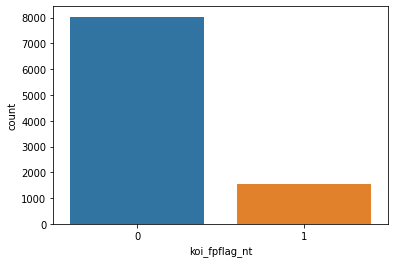

In [37]:
sns.countplot('koi_fpflag_nt', data=df)

In [26]:
df.value_counts('koi_fpflag_ss')

koi_fpflag_ss
0    7338
1    2226
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


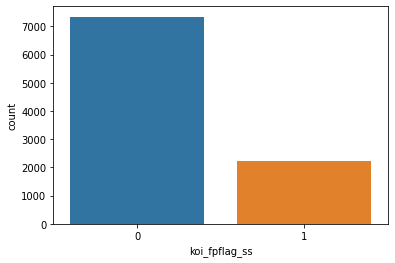

In [30]:
sns.countplot('koi_fpflag_ss', data=df)

In [27]:
df.value_counts('koi_fpflag_co')

koi_fpflag_co
0    7675
1    1889
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


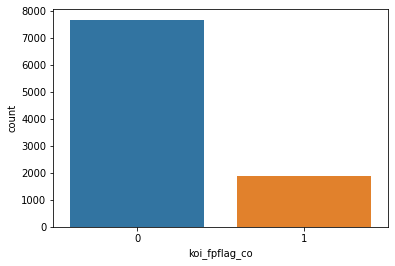

In [31]:
sns.countplot('koi_fpflag_co', data=df)

In [28]:
df.value_counts('koi_fpflag_ec')

koi_fpflag_ec
0    8416
1    1148
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


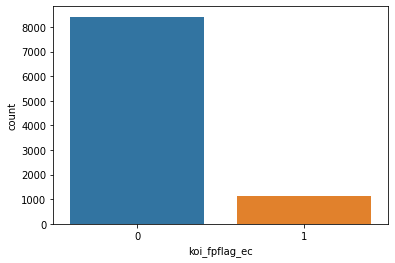

In [32]:
sns.countplot('koi_fpflag_ec', data=df)

In [36]:
df.drop(df.index[df['koi_fpflag_nt'] == 465], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9563 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9563 non-null   object 
 1   koi_pdisposition   9563 non-null   object 
 2   koi_score          9563 non-null   float64
 3   koi_fpflag_nt      9563 non-null   int64  
 4   koi_fpflag_ss      9563 non-null   int64  
 5   koi_fpflag_co      9563 non-null   int64  
 6   koi_fpflag_ec      9563 non-null   int64  
 7   koi_period         9563 non-null   float64
 8   koi_period_err1    9563 non-null   float64
 9   koi_period_err2    9563 non-null   float64
 10  koi_time0bk        9563 non-null   float64
 11  koi_time0bk_err1   9563 non-null   float64
 12  koi_time0bk_err2   9563 non-null   float64
 13  koi_impact         9563 non-null   float64
 14  koi_impact_err1    9563 non-null   float64
 15  koi_impact_err2    9563 non-null   float64
 16  koi_duration       9563 

In [40]:
#Extracting labels
labels = df['koi_disposition']
df.drop('koi_disposition', axis=1, inplace=True)

In [72]:
import collections
counter = collections.Counter(labels)
counter

Counter({1: 2357, 0: 2366, 2: 4840})

In [41]:
#Preprocessing values

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [57]:
columns = df.columns

In [54]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [55]:
labels

array([1, 1, 0, ..., 2, 0, 2])

In [60]:
for cols in columns:
    if cols == 'koi_pdisposition':
        le = LabelEncoder()
        df['koi_pdisposition'] = le.fit_transform(df['koi_pdisposition'])
    else:
        scaler = MinMaxScaler()
        df[cols] = scaler.fit_transform(np.array(df[cols]).reshape(-1, 1))

In [61]:
df.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1.000,0.0,0.0,0.0,0.0,0.000071,0.000161,0.999839,0.036999,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
1,0,0.969,0.0,0.0,0.0,0.0,0.000417,0.001434,0.998566,0.031063,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
2,0,0.000,0.0,0.0,0.0,0.0,0.000151,0.000086,0.999914,0.040928,...,0.900114,0.845778,0.029891,0.854184,0.003303,0.007041,0.999328,0.784346,0.733360,0.649689
3,1,0.000,0.0,1.0,0.0,0.0,0.000012,0.000002,0.999998,0.036828,...,0.901249,0.849539,0.036005,0.860812,0.002968,0.006074,0.999423,0.259826,0.742947,0.662039
4,0,1.000,0.0,0.0,0.0,0.0,0.000018,0.000022,0.999978,0.037781,...,0.880250,0.825842,0.047554,0.826015,0.004077,0.010093,0.998855,0.407085,0.739203,0.655289


In [83]:
#Baseline models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


xgb_clf = xgb.XGBClassifier()
lr_clf = LogisticRegression(max_iter=500)
knn_clf = KNeighborsClassifier()
sgd_clf = SGDClassifier()
svm_clf = SVC()

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, labels, train_size=0.8)

In [70]:
#Baseline Score

xgb_clf.fit(x_train, y_train)
print(f"XGB train score {xgb_clf.score(x_train, y_train)}")
print(f"XGB test Score {xgb_clf.score(x_test, y_test)}")
print()

lr_clf.fit(x_train, y_train)
print(f"lr train score {lr_clf.score(x_train, y_train)}")
print(f"lr test Score {lr_clf.score(x_test, y_test)}")
print()

knn_clf.fit(x_train, y_train)
print(f"knn train score {knn_clf.score(x_train, y_train)}")
print(f"knn test Score {knn_clf.score(x_test, y_test)}")
print()

sgd_clf.fit(x_train, y_train)
print(f"sgd train score {sgd_clf.score(x_train, y_train)}")
print(f"sgd test Score {sgd_clf.score(x_test, y_test)}")
print()

svm_clf.fit(x_train, y_train)
print(f"svm train score {svm_clf.score(x_train, y_train)}")
print(f"svm test Score {svm_clf.score(x_test, y_test)}")
print()

XGB train score 0.9407843137254902
XGB test Score 0.9247255619445897

lr train score 0.882483660130719
lr test Score 0.8808154730789336

knn train score 0.8963398692810457
knn test Score 0.8572922111866179

sgd train score 0.8558169934640523
sgd test Score 0.8578149503397805

svm train score 0.8515032679738562
svm test Score 0.8557239937271301



In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,  9],
    "learning_rate": [0.1, 0.05],
    "gamma": [0, 0.25, 1],
    "subsample": [0.8]
}
grid_cv = GridSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=3)
_ = grid_cv.fit(x_train, y_train)

In [76]:
grid_cv.best_score_

0.9245751633986927

In [77]:
grid_cv.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'subsample': 0.8}

In [86]:
final_xgb_cl = xgb.XGBClassifier(objective='multi:softmax')
final_xgb_cl.fit(x_train, y_train)
final_xgb_cl.score(x_test, y_test)

0.9247255619445897

In [85]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
# evaluate model
scores = cross_val_score(lr_clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.880 (0.013)


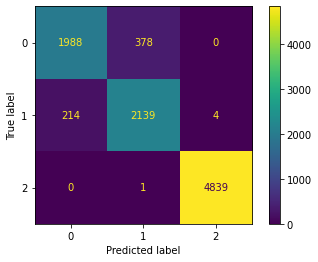

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

predict = final_xgb_cl.predict(df)
ConfusionMatrixDisplay(confusion_matrix(labels, predict)).plot()

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(labels, predict)

0.9375718916657952

# Q.1 Why this particular algorithm?

Ans. I tried some selected algorithms to make a baseline mode. Among all of them XGB and LogisticRegression performed the best in terms of train as well as validation score

# Q.2 What are the different tuning methods used for the algorithm?

Ans. I tried GridSearchCV to hypertune XGB

# Q.3 Did you consider any other choice of algorithm?Why or why not?

Ans. Yes, I considered Logistic regression, but XGB was performing better then LR I sticked to XGB.
The reason for considering another algorithm is because it was giving promising results, so I though with some tuning it might perform well than XGB.

# Q.4 What is the accuracy?

Ans. 0.9375718916657952

# Q.5 What are the different types of metrics that can be used to evaluate the model?


Ans. 

*   Confusion matrix
*   Presision
*Recall
*F1 scoree
*AUC ROC curves




